In [ ]:
!pip install neuralprophet

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from neuralprophet import NeuralProphet

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path of folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/2024_08_28/'

# Get list of all CSV files in the folder
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold the dataframes
dfs = []

# Loop through the CSV files and read each one into a dataframe
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)
data.head(10)

Mounted at /content/drive


WARNING - (py.warnings._showwarnmsg) - <ipython-input-4-6264eb15e071>:15: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)

  df = pd.read_csv(file)



,Last Occurred On,Alarm Source,Alarm Severity,Alarm Name,Alarm ID,Alarm Location Info,Site Name,Cleared On,First Occurred On,Clearance Status,Ticket ID,Site ID,Vendor,Domain,Device Type
0,2024-08-27 12:08:58,Pahamunegama-AN0157-BHP,Major,Remote Maintenance Link Failure,25901,"Cabinet No.=0, Subrack No.=0, Slot No.=7",Pahamunegama,2024-08-27 12:45:04,2024-08-06 15:55:01,Cleared,NaN,AN0157,HUAWEI,Access,eNodeB
1,2024-08-27 12:05:47,Pahamunegama-AN0157-BHP,Major,RF Unit Maintenance Link Failure,26235,"Cabinet No.=0, Subrack No.=241, Slot No.=0, Bo...",Pahamunegama,2024-08-27 12:45:04,2024-08-06 15:51:49,Cleared,NaN,AN0157,HUAWEI,Access,eNodeB
2,2024-08-27 12:05:47,Pahamunegama-AN0157-BHP,Major,Board Not In Position,26204,"Cabinet No.=0, Subrack No.=0, Slot No.=3, Boar...",Pahamunegama,2024-08-27 12:45:04,2024-08-06 15:58:36,Cleared,NaN,AN0157,HUAWEI,Access,eNodeB
3,2024-08-27 08:11:09,Athurugiriya-CM0002-L,Major,RF Unit CPRI Interface Error,26504,"Cabinet No.=0, Subrack No.=60, Slot No.=0, Por...",Athurugiriya,2024-08-27 20:37:54,2024-08-24 01:03:03,Cleared,TT-20240822-00000578,CM0002,HUAWEI,Access,eNodeB
4,2024-08-27 03:04:02,Athurugiriya-CM0002-L,Major,RF Unit Maintenance Link Failure,26235,"Cabinet No.=0, Subrack No.=62, Slot No.=0, Boa...",Athurugiriya,2024-08-27 03:04:07,2024-08-23 11:50:51,Cleared,TT-20240827-00000014,CM0002,HUAWEI,Access,eNodeB
5,2024-08-27 02:02:04,Col_Rugam-BA0059-CP,Minor,RF Unit VSWR Threshold Crossed,26529,"Cabinet No.=0, Subrack No.=220, Slot No.=0, TX...",Rugam,2024-08-27 07:48:05,2024-08-20 20:07:38,Cleared,NaN,BA0059,HUAWEI,Access,NaN
6,2024-08-26 18:24:10,MC2_Katukeliyawa-AN0091-BHP,Major,Board Not In Position,26204,"Cabinet No.=0, Subrack No.=0, Slot No.=5, Boar...",Katukeliyawa,2024-08-26 18:34:00,2024-08-16 15:27:57,Cleared,NaN,AN0091,HUAWEI,Access,eNodeB
7,2024-08-26 17:05:22,MC2_Katukeliyawa-AN0091-BHP,Major,Remote Maintenance Link Failure,25901,"Cabinet No.=0, Subrack No.=0, Slot No.=7",Katukeliyawa,2024-08-26 18:24:10,2024-08-16 15:31:09,Cleared,NaN,AN0091,HUAWEI,Access,eNodeB
8,2024-08-26 16:30:46,Makola-GM0084-BGHOP,Major,BBU CPRI Interface Error,26234,"Cabinet No.=0, Subrack No.=0, Slot No.=5, Port...",Makola,2024-08-26 16:31:34,2024-07-11 07:15:56,Cleared,TT-20240711-00000620,GM0084,HUAWEI,Access,GBTS
9,2024-08-26 15:41:26,Athurugiriya-CM0002-L,Minor,RF Unit CPRI Interface Error,26504,"Cabinet No.=0, Subrack No.=60, Slot No.=0, Por...",Athurugiriya,2024-08-26 16:50:11,2024-08-24 01:03:28,Cleared,NaN,CM0002,HUAWEI,Access,eNodeB


In [ ]:
# sort the first occured column in to latest alarms

data['First Occurred On'] = pd.to_datetime(data['First Occurred On'])
data = data.sort_values(by='First Occurred On', ascending=False)
data.head(10)

,Last Occurred On,Alarm Source,Alarm Severity,Alarm Name,Alarm ID,Alarm Location Info,Site Name,Cleared On,First Occurred On,Clearance Status,Ticket ID,Site ID,Vendor,Domain,Device Type
38,2024-08-24 23:59:32,MSSUPL1H,Major,Base Plane Packet Error and Loss,1104,"Destination rack number=1, Destination positio...",Dummy,2024-08-25 00:05:32,2024-08-24 23:59:32,Cleared,NaN,VV0000,HUAWEI,Core,CGPOMU
39,2024-08-24 23:59:26,Cloud UDN,Major,Insufficient Disk Space for User Plane Northbo...,86004,"Service Name=MbbUfdrFtpDataExposure, Object Na...",Malabe_South,2024-08-25 00:09:33,2024-08-24 23:59:26,Cleared,NaN,CM0424,HUAWEI,Others,CloudUDN
42,2024-08-24 23:59:24,MC2_Thalladi-MA0004-BHLP,Minor,RF Unit VSWR Threshold Crossed,26529,"Cabinet No.=0, Subrack No.=60, Slot No.=0, TX ...",Thalladi,2024-08-25 06:03:24,2024-08-24 23:59:24,Cleared,NaN,MA0004,HUAWEI,Access,eNodeB
41,2024-08-24 23:59:24,Thalladi-MA0004-DG,Minor,RF Unit VSWR Threshold Crossed,26529,"Cabinet No.=0, Subrack No.=60, Slot No.=0, TX ...",Thalladi,2024-08-25 06:03:25,2024-08-24 23:59:24,Cleared,NaN,MA0004,HUAWEI,Access,eGBTS
43,2024-08-24 23:58:56,PILI_VUSN01,Major,S1ap Link Down,80589,"Mobile Country Code=413, Mobile Network Code=0...",NaN,2024-08-24 23:59:04,2024-08-24 23:58:56,Cleared,NaN,NaN,HUAWEI,Others,NaN
45,2024-08-24 23:58:53,vUSN02,Major,S1ap Link Down,80589,"Mobile Country Code=413, Mobile Network Code=0...",NaN,2024-08-25 00:02:51,2024-08-24 23:58:53,Cleared,NaN,NaN,HUAWEI,Others,NaN
44,2024-08-24 23:58:53,vUSN02,Major,S1ap Link Down,80589,"Mobile Country Code=413, Mobile Network Code=0...",NaN,2024-08-25 00:04:22,2024-08-24 23:58:53,Cleared,NaN,NaN,HUAWEI,Others,NaN
46,2024-08-24 23:58:48,HMBSC16Kotikawatta,Minor,Adjacent Node IP Path Excessive Packet Loss Rate,21395,"Subrack No.=0, Slot No.=17, Adjacent Node ID=1...",Dummy,2024-08-25 00:13:50,2024-08-24 23:58:48,Cleared,NaN,VV0000,HUAWEI,Access,RNC
47,2024-08-24 23:58:47,Kokkutoduvai-MU0010-BHP,Critical,S1 Interface Fault,29201,"eNodeB Function Name=Kokkutoduvai-MU0010-BHP, ...",Kokkutoduvai,2024-08-24 23:59:32,2024-08-24 23:58:47,Cleared,NaN,MU0010,HUAWEI,Access,eNodeB
49,2024-08-24 23:58:46,MLB_eSight,Minor,CPU Usages of UVP Key Processes Exceed the Thr...,3096,"Source=FS_az1.dc3.dialog.com, DeviceType=Fusio...",Malabe_South,2024-08-24 23:59:11,2024-08-24 23:58:46,Cleared,NaN,CM0424,HUAWEI,Others,eSight-NFV


In [ ]:
#print KU0634 alarms

ku0634_alarms = data[data['Site ID'] == 'KU0634']
ku0634_alarms.head(10)

,Last Occurred On,Alarm Source,Alarm Severity,Alarm Name,Alarm ID,Alarm Location Info,Site Name,Cleared On,First Occurred On,Clearance Status,Ticket ID,Site ID,Vendor,Domain,Device Type


In [ ]:
# prompt: filter the dataset for only PU0062,KU0634,CM0905,AM0053,PU0009,AM0212,HA0054,CM0204,AM0053,GM0067 site ids

# Filter for specific site IDs
site_ids = ['PU0062',  'CM0905', 'AM0053', 'PU0009', 'AM0212', 'HA0054', 'CM0204', 'AM0053', 'GM0067']
data_select = data[data['Site ID'].isin(site_ids)]
data_select.head(10)

,Last Occurred On,Alarm Source,Alarm Severity,Alarm Name,Alarm ID,Alarm Location Info,Site Name,Cleared On,First Occurred On,Clearance Status,Ticket ID,Site ID,Vendor,Domain,Device Type
383,2024-08-24 23:26:08,Dunagaha-GM0067-BDGHOP,Major,RF Unit TX Channel Gain Out of Range,26520,"Cabinet No.=0, Subrack No.=63, Slot No.=0, TX ...",Dunagaha,2024-08-24 23:42:55,2024-08-24 23:26:08,Cleared,NaN,GM0067,HUAWEI,Access,GBTS
1295,2024-08-24 22:14:26,Samanthurai_North-AM0053-HP,Major,RF Unit TX Channel Gain Out of Range,26520,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",Samanthurai_North,2024-08-24 22:20:35,2024-08-24 22:14:26,Cleared,NaN,AM0053,HUAWEI,Access,eNodeB
1773,2024-08-24 21:39:42,Samanthurai_North-AM0053-HP,Major,RF Unit TX Channel Gain Out of Range,26520,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",Samanthurai_North,2024-08-24 23:58:56,2024-08-24 21:39:42,Cleared,NaN,AM0053,HUAWEI,Access,eNodeB
2181,2024-08-24 21:10:47,Samanthurai_North-AM0053-HP,Major,RF Unit TX Channel Gain Out of Range,26520,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",Samanthurai_North,2024-08-24 21:33:01,2024-08-24 21:10:47,Cleared,NaN,AM0053,HUAWEI,Access,eNodeB
2536,2024-08-24 20:40:40,Samanthurai_North-AM0053-HP,Major,RF Unit TX Channel Gain Out of Range,26520,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",Samanthurai_North,2024-08-24 20:44:17,2024-08-24 20:40:40,Cleared,NaN,AM0053,HUAWEI,Access,eNodeB
2541,2024-08-24 20:39:52,Dunagaha-GM0067-L,Major,User Plane Fault,25954,Service Type=X2,Dunagaha,2024-08-24 22:26:21,2024-08-24 20:39:52,Cleared,NaN,GM0067,HUAWEI,Access,eNodeB
3740,2024-08-24 19:23:27,Samanthurai_North-AM0053-HP,Major,RF Unit TX Channel Gain Out of Range,26520,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",Samanthurai_North,2024-08-24 19:35:40,2024-08-24 19:23:27,Cleared,NaN,AM0053,HUAWEI,Access,eNodeB
4674,2024-08-24 18:26:24,MC1_Nagavil-PU0062-BDGHOP,Major,RF Unit External Power Supply Insufficient,26546,"Cabinet No.=0, Subrack No.=102, Slot No.=0, Sp...",Nagavil,2024-08-24 18:35:40,2024-08-24 18:26:24,Cleared,NaN,PU0062,HUAWEI,Access,GBTS
4696,2024-08-24 18:25:12,MC1_Nagavil-PU0062-BDGHOP,Major,Mains Failure Alarm,65085,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",Nagavil,2024-08-24 18:27:24,2024-08-24 18:25:12,Cleared,NaN,PU0062,HUAWEI,Power,GBTS
5255,2024-08-24 18:02:52,Samanthurai_North-AM0053-HP,Major,RF Unit TX Channel Gain Out of Range,26520,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",Samanthurai_North,2024-08-24 18:15:28,2024-08-24 18:02:52,Cleared,NaN,AM0053,HUAWEI,Access,eNodeB


In [ ]:

data_selected = data_select[['Alarm Name', 'Alarm Location Info', 'First Occurred On', 'Site ID', 'Vendor', 'Domain', 'Device Type']]
data_selected.head(10)

,Alarm Name,Alarm Location Info,First Occurred On,Site ID,Vendor,Domain,Device Type
383,RF Unit TX Channel Gain Out of Range,"Cabinet No.=0, Subrack No.=63, Slot No.=0, TX ...",2024-08-24 23:26:08,GM0067,HUAWEI,Access,GBTS
1295,RF Unit TX Channel Gain Out of Range,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 22:14:26,AM0053,HUAWEI,Access,eNodeB
1773,RF Unit TX Channel Gain Out of Range,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 21:39:42,AM0053,HUAWEI,Access,eNodeB
2181,RF Unit TX Channel Gain Out of Range,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 21:10:47,AM0053,HUAWEI,Access,eNodeB
2536,RF Unit TX Channel Gain Out of Range,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 20:40:40,AM0053,HUAWEI,Access,eNodeB
2541,User Plane Fault,Service Type=X2,2024-08-24 20:39:52,GM0067,HUAWEI,Access,eNodeB
3740,RF Unit TX Channel Gain Out of Range,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 19:23:27,AM0053,HUAWEI,Access,eNodeB
4674,RF Unit External Power Supply Insufficient,"Cabinet No.=0, Subrack No.=102, Slot No.=0, Sp...",2024-08-24 18:26:24,PU0062,HUAWEI,Access,GBTS
4696,Mains Failure Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-24 18:25:12,PU0062,HUAWEI,Power,GBTS
5255,RF Unit TX Channel Gain Out of Range,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 18:02:52,AM0053,HUAWEI,Access,eNodeB


Encoding the alarms in the 6 sites to train the model

In [ ]:
# prompt: encode the Alarm name column  and rename that column as y

le = LabelEncoder()
data_selected['y'] = le.fit_transform(data_selected['Alarm Name'])
data_selected = data_selected.drop('Alarm Name', axis=1)
data_selected.head(10)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-9-a9b895c87a75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['y'] = le.fit_transform(data_selected['Alarm Name'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['y'] = le.fit_transform(data_selected['Alarm Name'])



,Alarm Location Info,First Occurred On,Site ID,Vendor,Domain,Device Type,y
383,"Cabinet No.=0, Subrack No.=63, Slot No.=0, TX ...",2024-08-24 23:26:08,GM0067,HUAWEI,Access,GBTS,47
1295,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 22:14:26,AM0053,HUAWEI,Access,eNodeB,47
1773,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 21:39:42,AM0053,HUAWEI,Access,eNodeB,47
2181,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 21:10:47,AM0053,HUAWEI,Access,eNodeB,47
2536,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 20:40:40,AM0053,HUAWEI,Access,eNodeB,47
2541,Service Type=X2,2024-08-24 20:39:52,GM0067,HUAWEI,Access,eNodeB,64
3740,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 19:23:27,AM0053,HUAWEI,Access,eNodeB,47
4674,"Cabinet No.=0, Subrack No.=102, Slot No.=0, Sp...",2024-08-24 18:26:24,PU0062,HUAWEI,Access,GBTS,43
4696,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-24 18:25:12,PU0062,HUAWEI,Power,GBTS,34
5255,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 18:02:52,AM0053,HUAWEI,Access,eNodeB,47


In [ ]:
# prompt: remove theft alarm from dataset

theft_index = le.transform(['Theft Alarm'])[0]
data_selected = data_selected[data_selected['y'] != theft_index]


In [ ]:
# prompt: give mapping of encoded value to alarm name  print line by line

for i, alarm_name in enumerate(le.classes_):
  print(f'{i}: {alarm_name}')

0: Ambient Temperature Unacceptable
1: BBU CPRI Interface Error
2: BBU CPRI Optical Module or Electrical Port Not Ready
3: Base Station DC Power Supply Abnormal
4: Battery Deep Discharge Alarm
5: Board Not In Position
6: Board Software Auto-Supply Failure
7: Board Temperature Unacceptable
8: CSL Fault
9: Carrier Configuration Error
10: Cell Blocked
11: Cell Capability Degraded
12: Cell Out of Service
13: Cell Unavailable
14: Configured Capacity Limit Exceeding Licensed Limit
15: Data Configuration Exceeding Licensed Limit
16: ESL Link Fault
17: Ethernet Link Fault
18: Extend Alarm
19: External Clock Reference Problem
20: Fuse Failure Alarm
21: GNSS Antenna Fault
22: GSM Local Cell Capability Decline
23: GSM Local Cell Unusable
24: Generator On Load Alarm
25: IP Clock Link Failure
26: IP PM Activation Failure
27: IP Path Fault
28: Inter-Board Service Link Failure
29: Inter-System Site-Level Configuration Conflict
30: Licensed Feature Unusable
31: Local User Consecutive Login Retries Fai

In [ ]:
# prompt: save the label encoder for future use , and remember 'RF Unit TX Channel Gain Out of Range'  .It is the target alarm to forecast

import pickle

# Save the LabelEncoder
with open('label_encoder.pkl', 'wb') as f:
  pickle.dump(le, f)

# Find the index for 'RF Unit TX Channel Gain Out of Range'
target_alarm_index = le.transform(['RF Unit TX Channel Gain Out of Range'])[0]
print(f"Target alarm index: {target_alarm_index}")


Target alarm index: 47


In [ ]:
# prompt: rename first occured column as ds

data_selected = data_selected.rename(columns={'First Occurred On': 'ds'})
data_selected.head(10)


,Alarm Location Info,ds,Site ID,Vendor,Domain,Device Type,y
383,"Cabinet No.=0, Subrack No.=63, Slot No.=0, TX ...",2024-08-24 23:26:08,GM0067,HUAWEI,Access,GBTS,47
1295,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 22:14:26,AM0053,HUAWEI,Access,eNodeB,47
1773,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 21:39:42,AM0053,HUAWEI,Access,eNodeB,47
2181,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 21:10:47,AM0053,HUAWEI,Access,eNodeB,47
2536,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 20:40:40,AM0053,HUAWEI,Access,eNodeB,47
2541,Service Type=X2,2024-08-24 20:39:52,GM0067,HUAWEI,Access,eNodeB,64
3740,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 19:23:27,AM0053,HUAWEI,Access,eNodeB,47
4674,"Cabinet No.=0, Subrack No.=102, Slot No.=0, Sp...",2024-08-24 18:26:24,PU0062,HUAWEI,Access,GBTS,43
4696,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-24 18:25:12,PU0062,HUAWEI,Power,GBTS,34
5255,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 18:02:52,AM0053,HUAWEI,Access,eNodeB,47


In [ ]:
# prompt: sort accoding to ds column latest alarms

data_selected['ds'] = pd.to_datetime(data_selected['ds'])
data_selected = data_selected.sort_values(by='ds', ascending=False)
data_selected.head(10)

,Alarm Location Info,ds,Site ID,Vendor,Domain,Device Type,y
383,"Cabinet No.=0, Subrack No.=63, Slot No.=0, TX ...",2024-08-24 23:26:08,GM0067,HUAWEI,Access,GBTS,47
1295,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 22:14:26,AM0053,HUAWEI,Access,eNodeB,47
1773,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 21:39:42,AM0053,HUAWEI,Access,eNodeB,47
2181,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 21:10:47,AM0053,HUAWEI,Access,eNodeB,47
2536,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 20:40:40,AM0053,HUAWEI,Access,eNodeB,47
2541,Service Type=X2,2024-08-24 20:39:52,GM0067,HUAWEI,Access,eNodeB,64
3740,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 19:23:27,AM0053,HUAWEI,Access,eNodeB,47
4674,"Cabinet No.=0, Subrack No.=102, Slot No.=0, Sp...",2024-08-24 18:26:24,PU0062,HUAWEI,Access,GBTS,43
4696,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-24 18:25:12,PU0062,HUAWEI,Power,GBTS,34
5255,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 18:02:52,AM0053,HUAWEI,Access,eNodeB,47


In [ ]:
data_selected.head(10)

,Alarm Location Info,ds,Site ID,Vendor,Domain,Device Type,y
383,"Cabinet No.=0, Subrack No.=63, Slot No.=0, TX ...",2024-08-24 23:26:08,GM0067,HUAWEI,Access,GBTS,47
1295,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 22:14:26,AM0053,HUAWEI,Access,eNodeB,47
1773,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 21:39:42,AM0053,HUAWEI,Access,eNodeB,47
2181,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 21:10:47,AM0053,HUAWEI,Access,eNodeB,47
2536,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 20:40:40,AM0053,HUAWEI,Access,eNodeB,47
2541,Service Type=X2,2024-08-24 20:39:52,GM0067,HUAWEI,Access,eNodeB,64
3740,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 19:23:27,AM0053,HUAWEI,Access,eNodeB,47
4674,"Cabinet No.=0, Subrack No.=102, Slot No.=0, Sp...",2024-08-24 18:26:24,PU0062,HUAWEI,Access,GBTS,43
4696,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-24 18:25:12,PU0062,HUAWEI,Power,GBTS,34
5255,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 18:02:52,AM0053,HUAWEI,Access,eNodeB,47


In [ ]:
# prompt: drop rows with y is unknown

data_selected = data_selected[data_selected['y'] != 'Unknown']

In [ ]:
# prompt: remove duplicates in ds

data_selected = data_selected.drop_duplicates(subset=['ds'])
data_selected.head(10)


,Alarm Location Info,ds,Site ID,Vendor,Domain,Device Type,y
383,"Cabinet No.=0, Subrack No.=63, Slot No.=0, TX ...",2024-08-24 23:26:08,GM0067,HUAWEI,Access,GBTS,47
1295,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 22:14:26,AM0053,HUAWEI,Access,eNodeB,47
1773,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 21:39:42,AM0053,HUAWEI,Access,eNodeB,47
2181,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 21:10:47,AM0053,HUAWEI,Access,eNodeB,47
2536,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 20:40:40,AM0053,HUAWEI,Access,eNodeB,47
2541,Service Type=X2,2024-08-24 20:39:52,GM0067,HUAWEI,Access,eNodeB,64
3740,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 19:23:27,AM0053,HUAWEI,Access,eNodeB,47
4674,"Cabinet No.=0, Subrack No.=102, Slot No.=0, Sp...",2024-08-24 18:26:24,PU0062,HUAWEI,Access,GBTS,43
4696,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-24 18:25:12,PU0062,HUAWEI,Power,GBTS,34
5255,"Cabinet No.=0, Subrack No.=132, Slot No.=0, TX...",2024-08-24 18:02:52,AM0053,HUAWEI,Access,eNodeB,47


In [ ]:


# Keep only 'ds' and 'y' columns (preprocessing for NeuralProphet)
data_selected = data_selected[['ds', 'y', 'Site ID']]
data_selected.head(10)


,ds,y,Site ID
383,2024-08-24 23:26:08,47,GM0067
1295,2024-08-24 22:14:26,47,AM0053
1773,2024-08-24 21:39:42,47,AM0053
2181,2024-08-24 21:10:47,47,AM0053
2536,2024-08-24 20:40:40,47,AM0053
2541,2024-08-24 20:39:52,64,GM0067
3740,2024-08-24 19:23:27,47,AM0053
4674,2024-08-24 18:26:24,43,PU0062
4696,2024-08-24 18:25:12,34,PU0062
5255,2024-08-24 18:02:52,47,AM0053


In [ ]:
# Convert 'ds' to datetime if it's not already
data_selected['ds'] = pd.to_datetime(data_selected['ds'])

# Round the 'ds' column to the nearest 5 hours
# data_selected['ds_rounded'] = data_selected['ds'].dt.floor('3H')

# Drop duplicates based on the rounded timestamp and 'Site ID'
# balanced_data = data_selected.drop_duplicates(subset=['ds_rounded', 'Site ID'], keep='first')

# Drop the 'ds_rounded' column as it's no longer needed
# data_selected = balanced_data.drop(columns=['ds_rounded'])

# Display the first 10 rows to check the result
data_selected.head(10)


WARNING - (py.warnings._showwarnmsg) - <ipython-input-19-da370a26bc1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['ds'] = pd.to_datetime(data_selected['ds'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['ds'] = pd.to_datetime(data_selected['ds'])



,ds,y,Site ID
383,2024-08-24 23:26:08,47,GM0067
1295,2024-08-24 22:14:26,47,AM0053
1773,2024-08-24 21:39:42,47,AM0053
2181,2024-08-24 21:10:47,47,AM0053
2536,2024-08-24 20:40:40,47,AM0053
2541,2024-08-24 20:39:52,64,GM0067
3740,2024-08-24 19:23:27,47,AM0053
4674,2024-08-24 18:26:24,43,PU0062
4696,2024-08-24 18:25:12,34,PU0062
5255,2024-08-24 18:02:52,47,AM0053


In [ ]:
# prompt: create seperate dataframes for each site id with ds and y columns

site_dfs = {}
for site_id, group_data in data_selected.groupby('Site ID'):
  site_dfs[site_id] = group_data[['ds', 'y']]


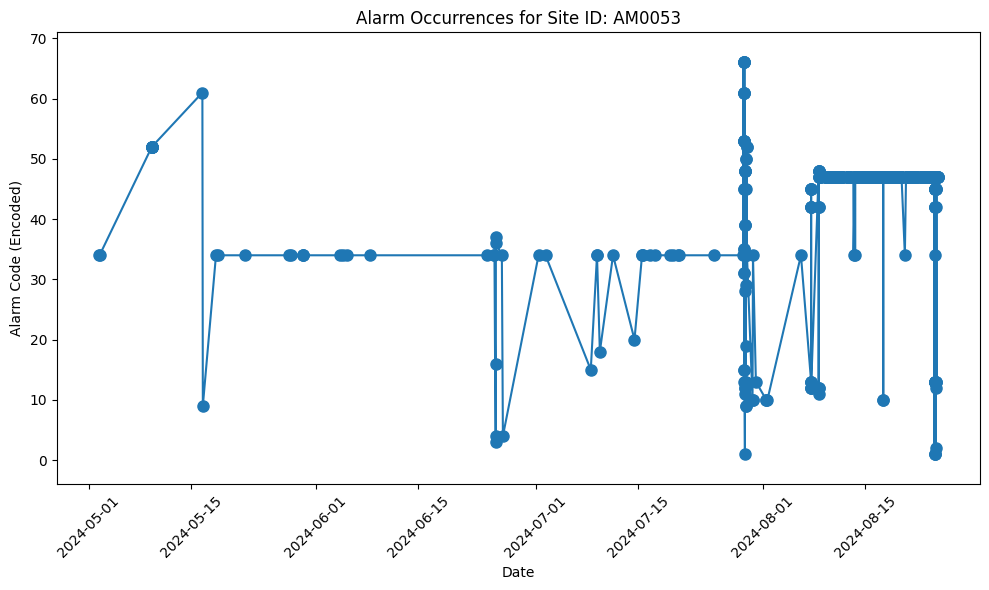

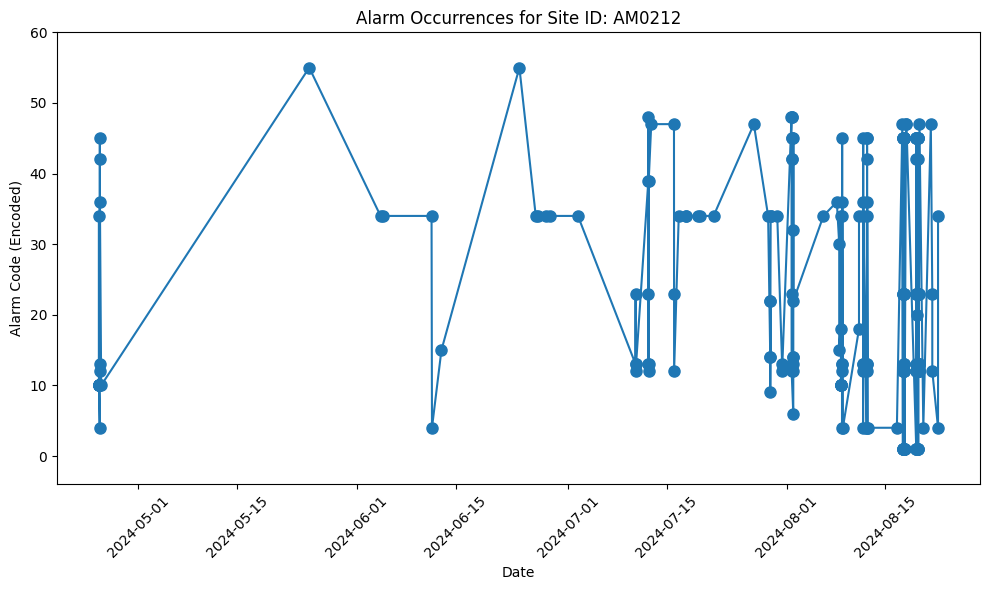

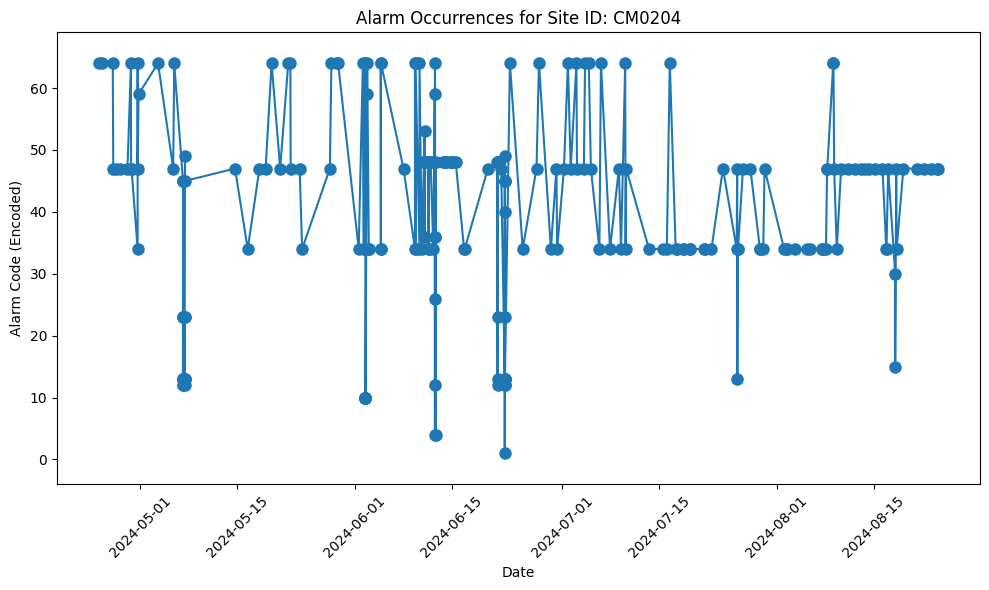

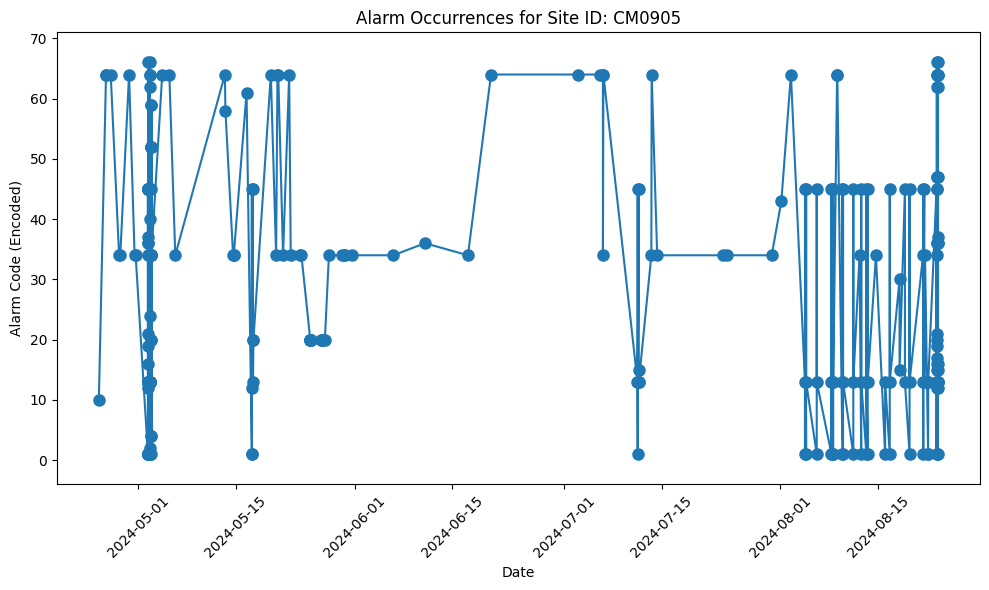

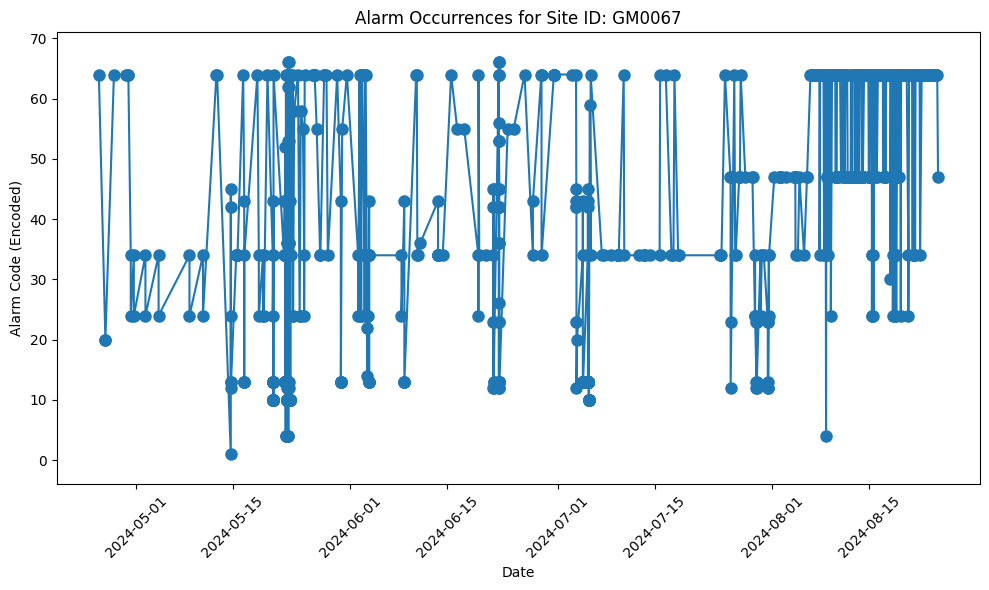

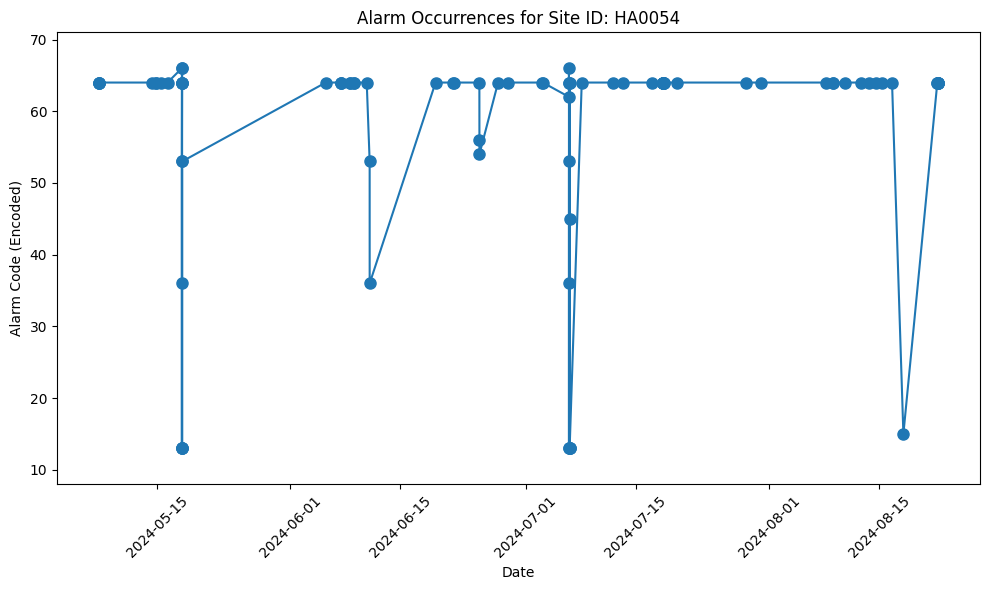

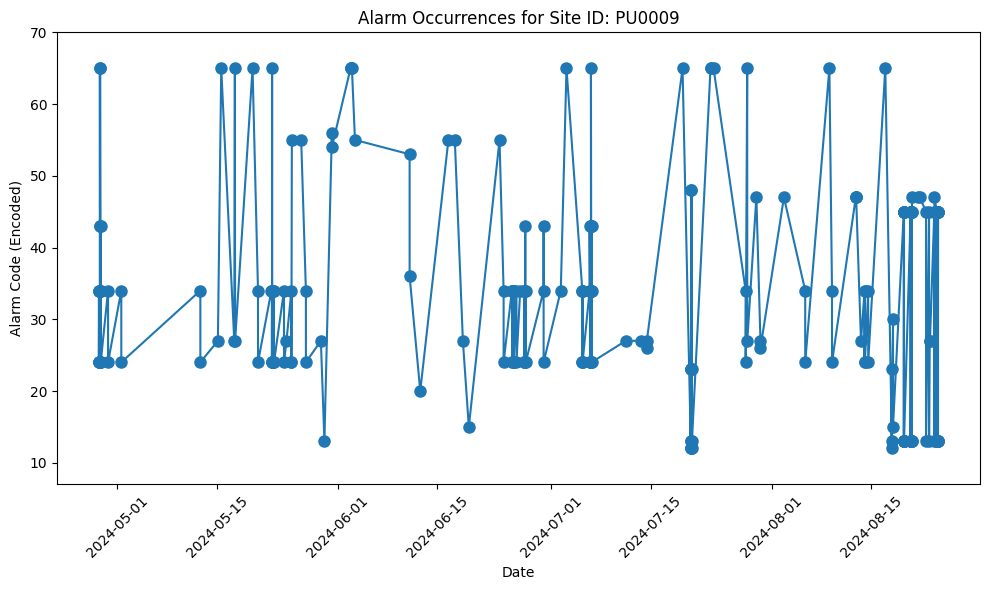

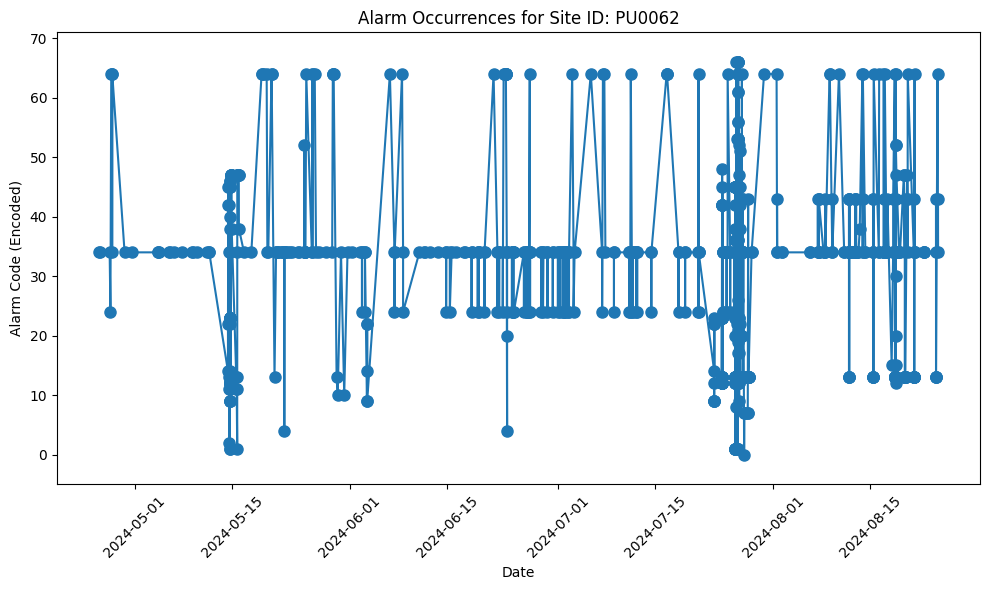

In [ ]:
# prompt: fore each site id plot the actual alarms that came, and connect those dots , increate the range of that line , up and down

import matplotlib.pyplot as plt

for site_id, df in site_dfs.items():
  plt.figure(figsize=(10, 6))
  plt.plot(df['ds'], df['y'], marker='o', linestyle='-', markersize=8)

  # Increase the range of the line up and down
  plt.ylim(df['y'].min() - 5, df['y'].max() + 5)

  plt.title(f'Alarm Occurrences for Site ID: {site_id}')
  plt.xlabel('Date')
  plt.ylabel('Alarm Code (Encoded)')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency -1S corresponds to 3.302% of the data.
INFO:NP.df_utils:Major frequency -1S corresponds to 3.302% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonali

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (27) is too small than the required number                     for the learning rate finder (217). The results might not be optimal.


Finding best initial lr:   0%|          | 0/217 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 16. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency -1S corresponds to 3.302% of the data.
INFO:NP.df_utils:Major frequency -1S corresponds to 3.302% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 99.405% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
INF

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


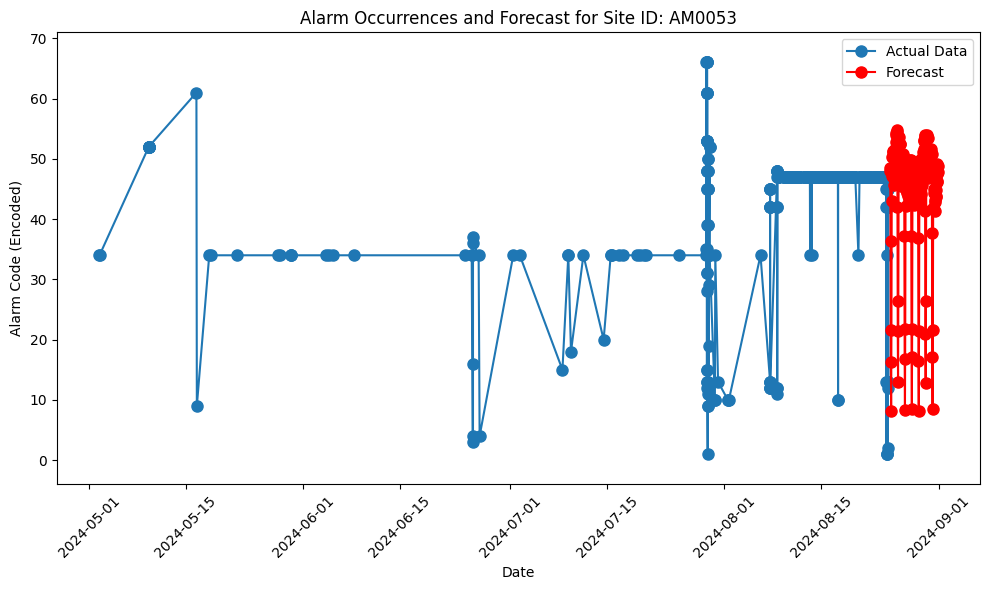

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency -2S corresponds to 7.907% of the data.
INFO:NP.df_utils:Major frequency -2S corresponds to 7.907% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonali

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (14) is too small than the required number                     for the learning rate finder (212). The results might not be optimal.


Finding best initial lr:   0%|          | 0/212 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 7. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency -2S corresponds to 7.907% of the data.
INFO:NP.df_utils:Major frequency -2S corresponds to 7.907% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 99.405% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
INF

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


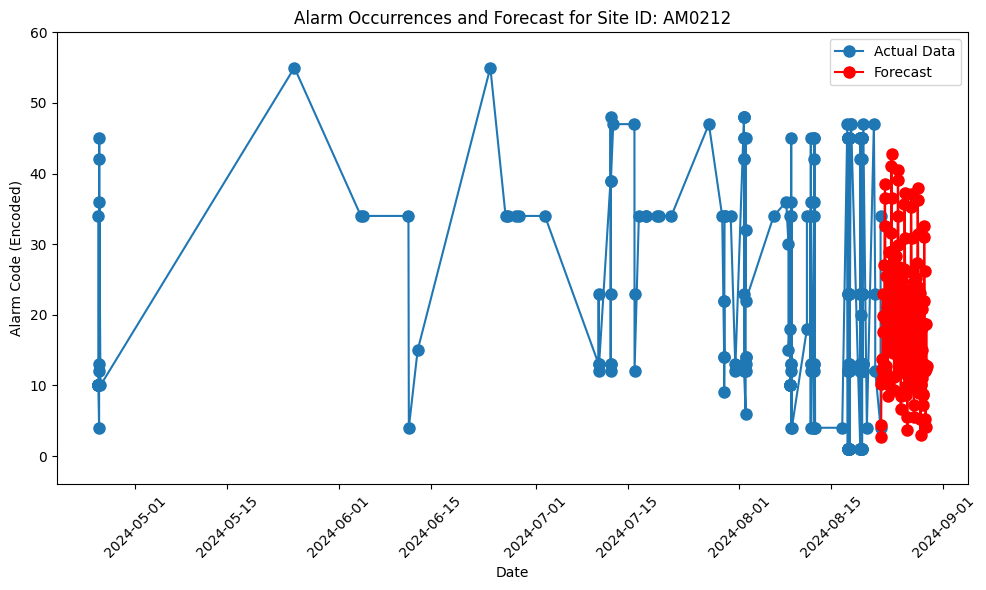

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency -2S corresponds to 4.382% of the data.
INFO:NP.df_utils:Major frequency -2S corresponds to 4.382% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonali

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (16) is too small than the required number                     for the learning rate finder (213). The results might not be optimal.


Finding best initial lr:   0%|          | 0/213 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 11. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency -2S corresponds to 4.382% of the data.
INFO:NP.df_utils:Major frequency -2S corresponds to 4.382% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 99.405% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
INF

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


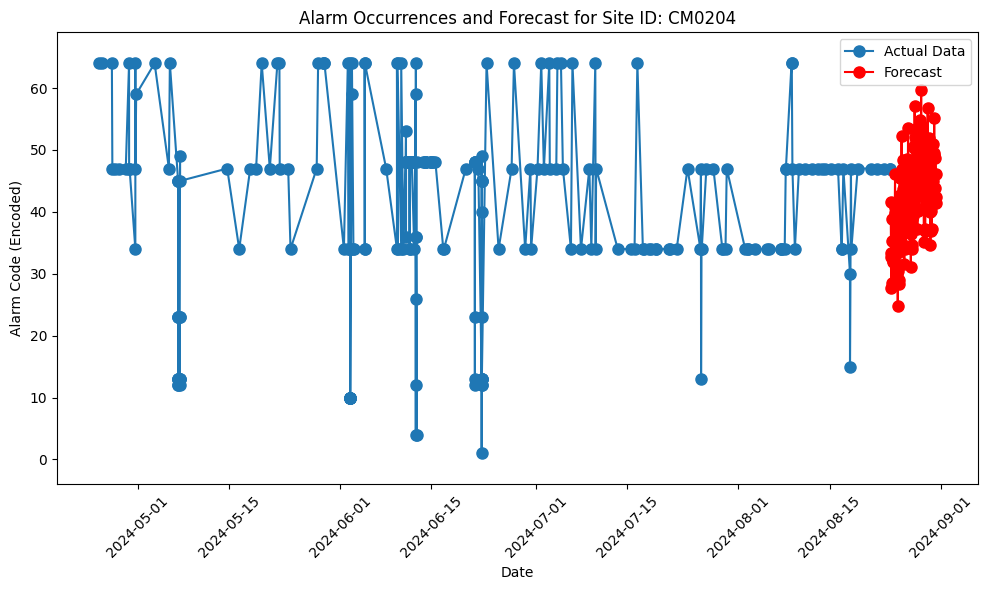

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency -3S corresponds to 9.434% of the data.
INFO:NP.df_utils:Major frequency -3S corresponds to 9.434% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonali

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (17) is too small than the required number                     for the learning rate finder (214). The results might not be optimal.


Finding best initial lr:   0%|          | 0/214 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 9. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency -3S corresponds to 9.434% of the data.
INFO:NP.df_utils:Major frequency -3S corresponds to 9.434% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 99.405% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
INF

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


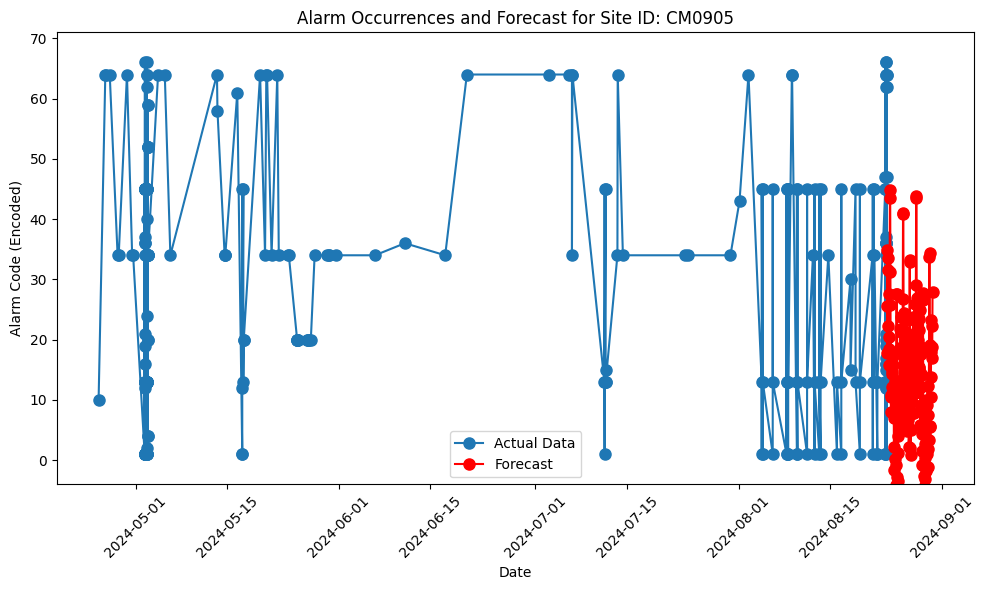

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency -3S corresponds to 18.021% of the data.
INFO:NP.df_utils:Major frequency -3S corresponds to 18.021% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasona

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (30) is too small than the required number                     for the learning rate finder (225). The results might not be optimal.


Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency -3S corresponds to 18.021% of the data.
INFO:NP.df_utils:Major frequency -3S corresponds to 18.021% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 99.405% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
I

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


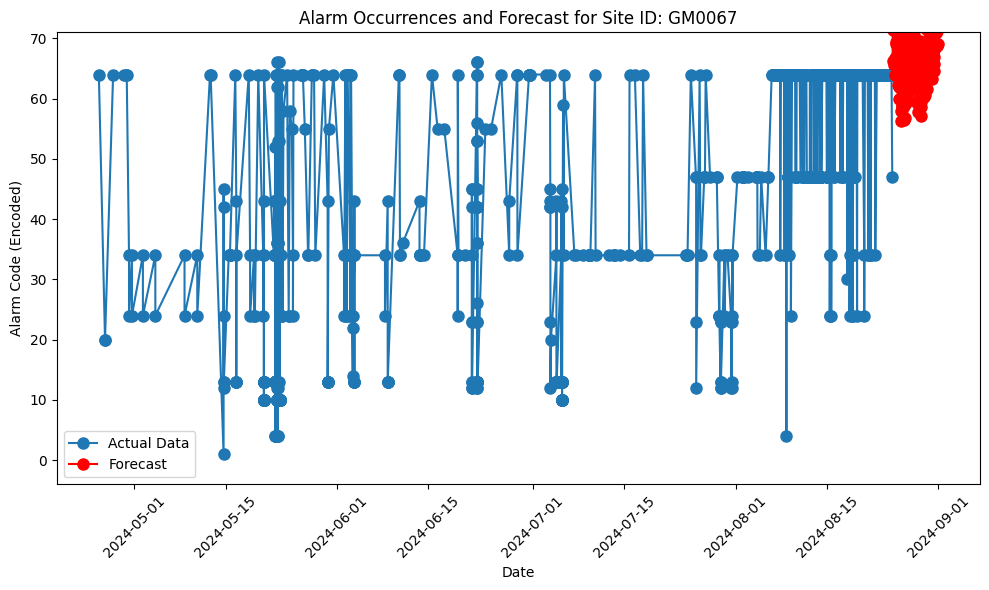

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency -16T corresponds to 7.692% of the data.
INFO:NP.df_utils:Major frequency -16T corresponds to 7.692% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasona

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (12) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.


Finding best initial lr:   0%|          | 0/207 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 3. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency -16T corresponds to 7.692% of the data.
INFO:NP.df_utils:Major frequency -16T corresponds to 7.692% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 99.405% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
I

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


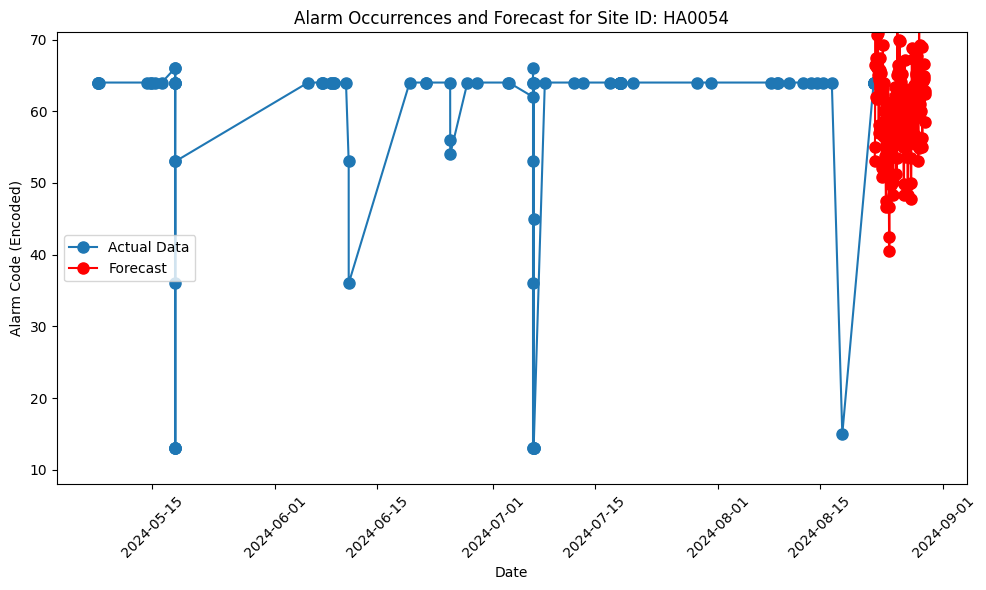

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency -2S corresponds to 6.415% of the data.
INFO:NP.df_utils:Major frequency -2S corresponds to 6.415% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonali

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (17) is too small than the required number                     for the learning rate finder (214). The results might not be optimal.


Finding best initial lr:   0%|          | 0/214 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency -2S corresponds to 6.415% of the data.
INFO:NP.df_utils:Major frequency -2S corresponds to 6.415% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 99.405% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
INF

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


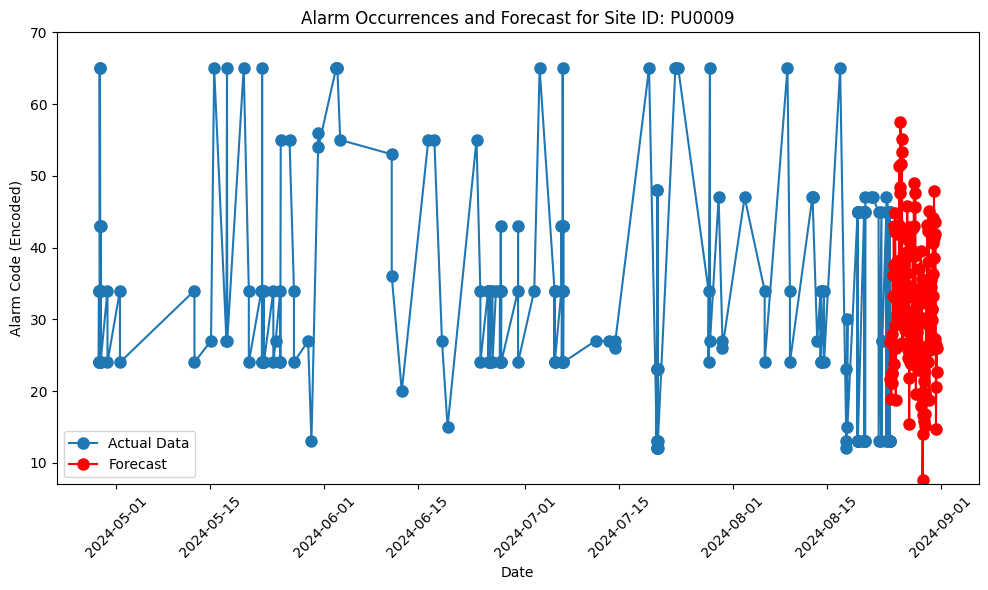

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency -3S corresponds to 10.526% of the data.
INFO:NP.df_utils:Major frequency -3S corresponds to 10.526% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasona

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (27) is too small than the required number                     for the learning rate finder (224). The results might not be optimal.


Finding best initial lr:   0%|          | 0/224 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 4. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency -3S corresponds to 10.526% of the data.
INFO:NP.df_utils:Major frequency -3S corresponds to 10.526% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq H. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 99.405% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO:NP.df_utils:Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.405% of the data.
I

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


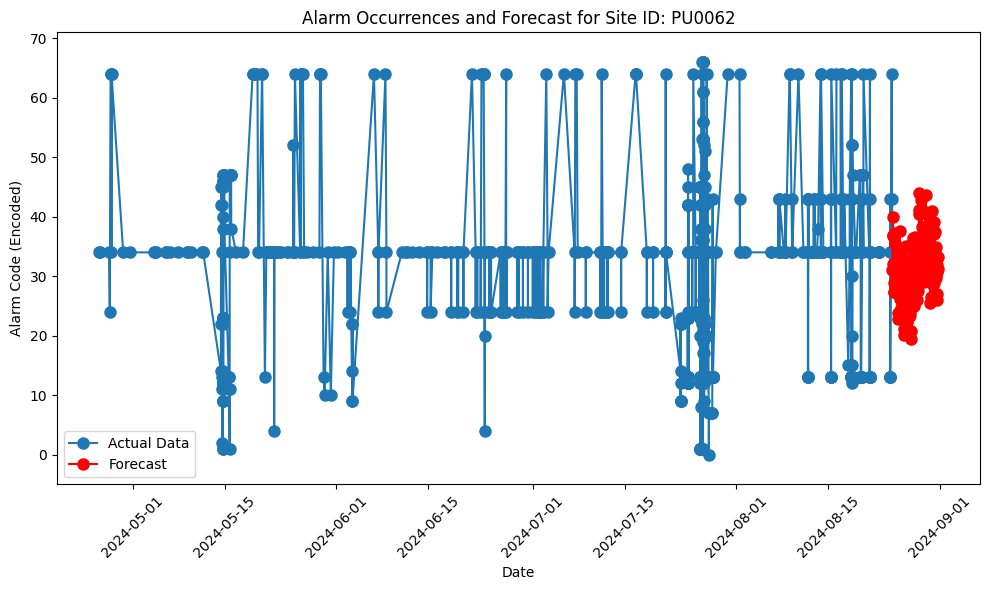

In [ ]:
# prompt: plot next upcoming dots for next 7 days in red color after the last date using neural prophet

# Assuming 'site_dfs' is your dictionary of site IDs and their corresponding DataFrames
for site_id, df in site_dfs.items():
  # Create and train the NeuralProphet model
  m = NeuralProphet()
  metrics = m.fit(df, freq="H")

  # Create future dataframe for forecasting
  future = m.make_future_dataframe(df, periods=7 * 24)  # 7 days * 24 hours

  # Make predictions
  forecast = m.predict(future)

  # Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(df['ds'], df['y'], marker='o', linestyle='-', markersize=8, label='Actual Data')
  plt.plot(forecast['ds'], forecast['yhat1'], marker='o', linestyle='-', markersize=8, color='red', label='Forecast')
  plt.ylim(df['y'].min() - 5, df['y'].max() + 5)
  plt.title(f'Alarm Occurrences and Forecast for Site ID: {site_id}')
  plt.xlabel('Date')
  plt.ylabel('Alarm Code (Encoded)')
  plt.xticks(rotation=45)
  plt.legend()
  plt.tight_layout()
  plt.show()


In [ ]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level
import pandas as pd

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Iterate over each site dataframe
site_models = {}
for site_id, df in site_dfs.items():
    # Ensure 'ds' is datetime
    df['ds'] = pd.to_datetime(df['ds'])

    # Resample the data by hour and calculate the mean
    df_resampled = df.set_index('ds').resample('H').mean().reset_index()

    # Create a NeuralProphet model with specific parameters

    # You can add model parameters here if needed, e.g., learning_rate, seasonality_mode, etc.
    # m = NeuralProphet(learning_rate=0.01, seasonality_mode='additive')
    m = NeuralProphet(learning_rate=0.1, seasonality_mode='additive')


    # Use static plotly in notebooks
    m.set_plotting_backend("plotly-static")

    # Fit the model on the dataset
    metrics = m.fit(df_resampled)

    # Predict only the next 7 days
    future = m.make_future_dataframe(df_resampled, periods=24*7, n_historic_predictions=False)

    # Generate forecast for the next 7 days
    forecast = m.predict(future)

    # Store the model, metrics, and forecast for each site ID
    site_models[site_id] = {
        'model': m,
        'metrics': metrics,
        'forecast': forecast
    }

# Now, `site_models` contains the fitted model, metrics, and 7-day forecast for each Site ID.


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 15. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Predicting: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Predicting: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Predicting: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - <ipython-input-23-5865857bc7ce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])



Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

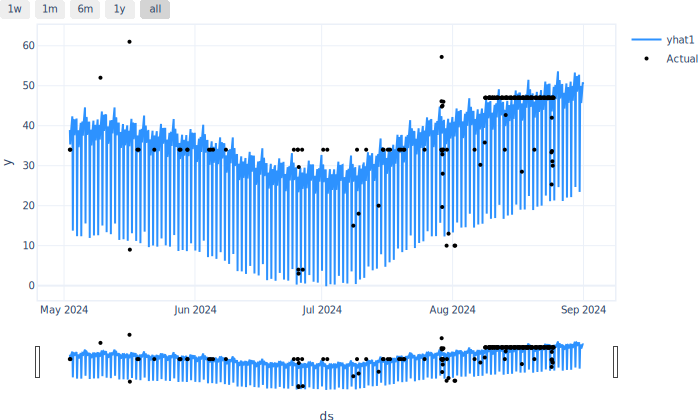

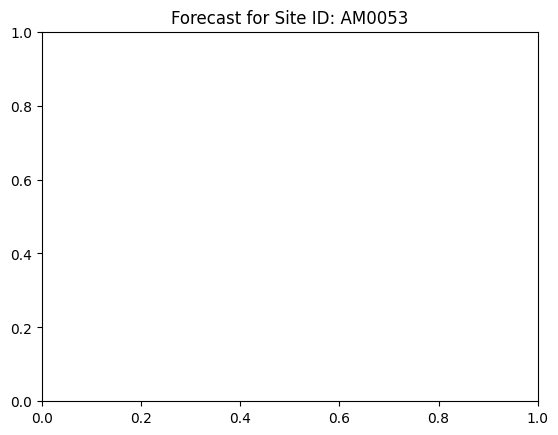

Predicting: |          | 0/? [00:00<?, ?it/s]

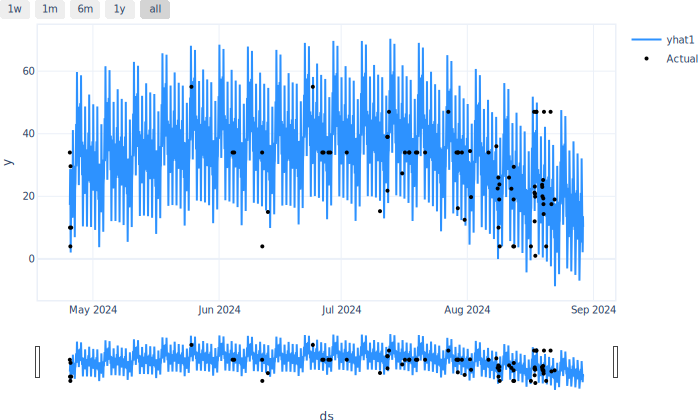

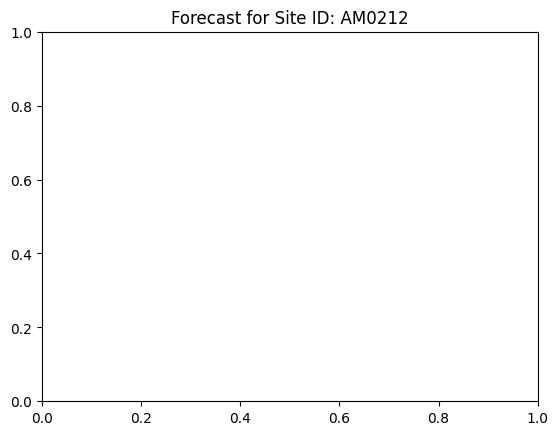

Predicting: |          | 0/? [00:00<?, ?it/s]

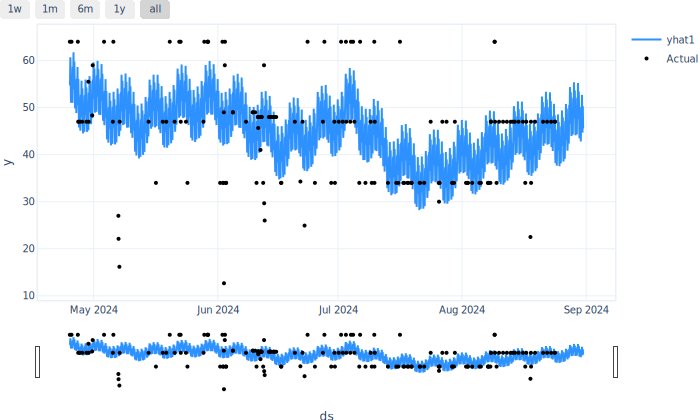

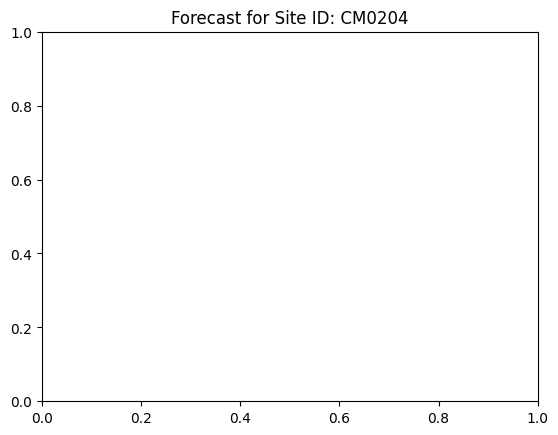

Predicting: |          | 0/? [00:00<?, ?it/s]

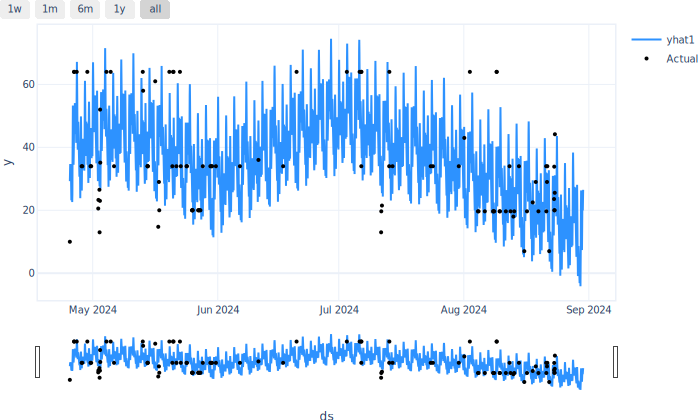

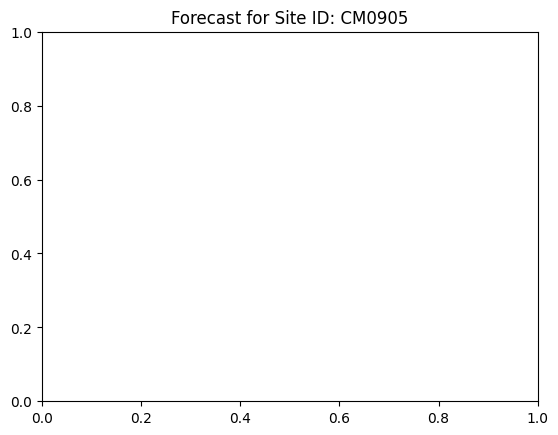

Predicting: |          | 0/? [00:00<?, ?it/s]

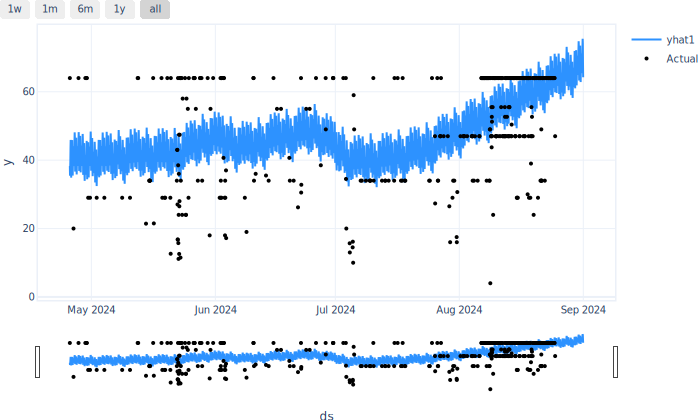

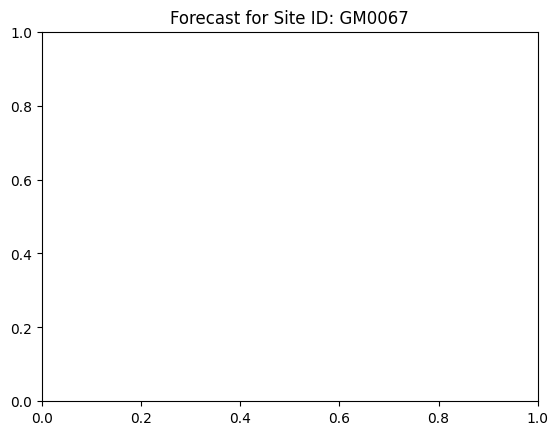

Predicting: |          | 0/? [00:00<?, ?it/s]

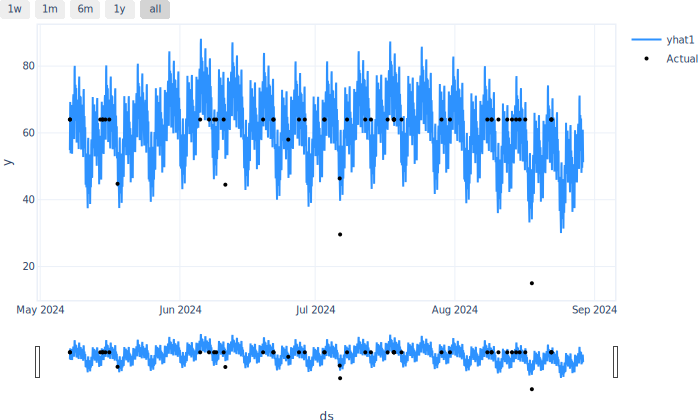

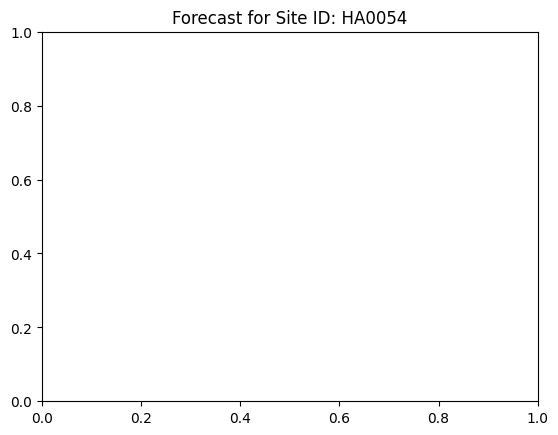

Predicting: |          | 0/? [00:00<?, ?it/s]

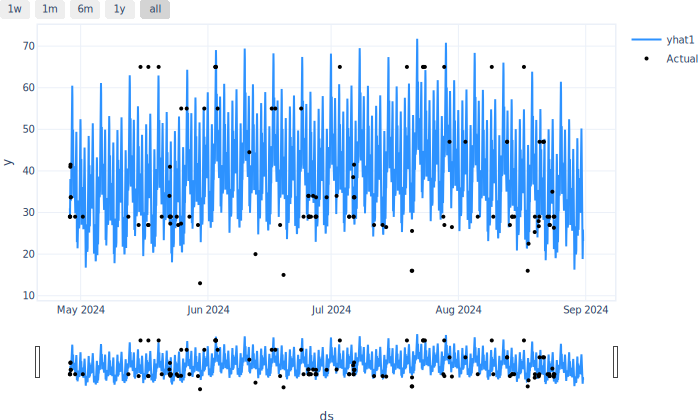

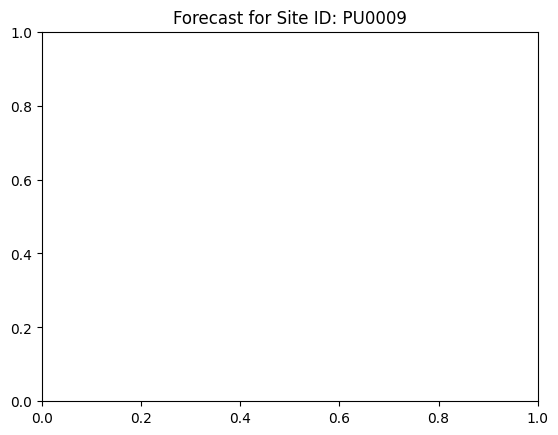

Predicting: |          | 0/? [00:00<?, ?it/s]

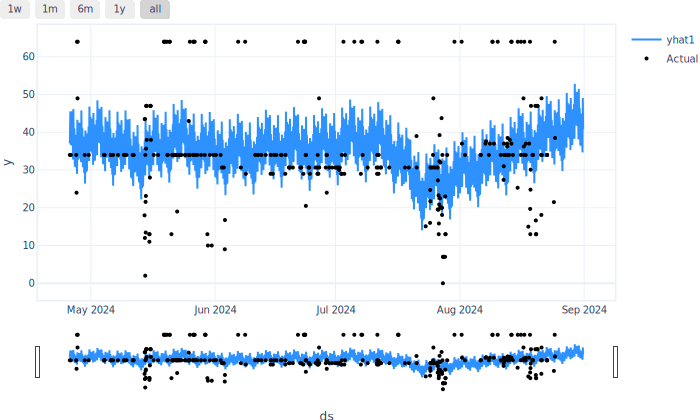

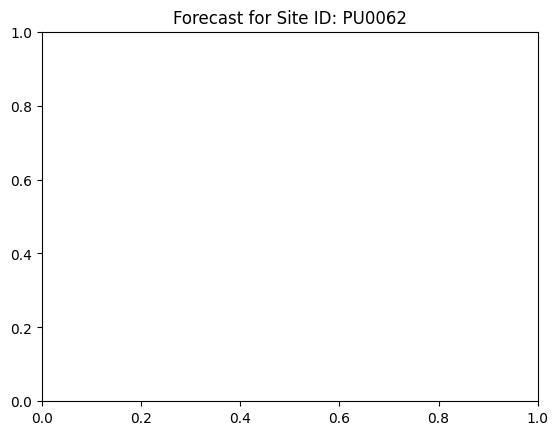

In [ ]:
import matplotlib.pyplot as plt

# Iterate over each site model to generate forecasts, save them, and plot
for site_id, model_data in site_models.items():
    m = model_data['model']  # Retrieve the fitted model
    df_resampled = site_dfs[site_id].set_index('ds').resample('H').mean().reset_index()  # Resample the original data

    # Create a future dataframe reaching 24*7 into the future, including historic predictions
    df_future = m.make_future_dataframe(df_resampled, n_historic_predictions=True, periods=24*7)

    # Predict the future
    forecast = m.predict(df_future)

    # Save the forecast in the site_models dictionary
    site_models[site_id]['forecast'] = forecast

    # Visualize the forecast
    fig = m.plot(forecast)

    # Add a title to the plot with the Site ID
    plt.title(f"Forecast for Site ID: {site_id}")

    # Display the plot
    plt.show()


In [ ]:
# prompt: print the forecast after the last day of dataset when the values in range 46 to 48 with site id

for site_id, model_data in site_models.items():
  forecast = model_data['forecast']
  last_date = df_resampled['ds'].max()
  forecast_filtered = forecast[(forecast['ds'] > last_date) & (forecast['yhat1'].between(46, 48))]
  if not forecast_filtered.empty:
    print(f"Site ID: {site_id}")
    print(forecast_filtered[['ds', 'yhat1']])


Site ID: AM0053
                      ds      yhat1
2746 2024-08-24 19:00:00  47.957355
2748 2024-08-24 21:00:00  47.652634
2756 2024-08-25 05:00:00  47.816235
2761 2024-08-25 10:00:00  47.911964
2762 2024-08-25 11:00:00  46.632225
2763 2024-08-25 12:00:00  47.552326
2786 2024-08-26 11:00:00  46.801334
2787 2024-08-26 12:00:00  47.452248
2789 2024-08-26 14:00:00  47.946037
2804 2024-08-27 05:00:00  46.815086
2805 2024-08-27 06:00:00  47.745682
2806 2024-08-27 07:00:00  47.116508
2813 2024-08-27 14:00:00  46.075493
2814 2024-08-27 15:00:00  46.728519
2815 2024-08-27 16:00:00  47.436668
2816 2024-08-27 17:00:00  47.193077
2817 2024-08-27 18:00:00  47.419056
2833 2024-08-28 10:00:00  47.070038
2835 2024-08-28 12:00:00  46.418060
2836 2024-08-28 13:00:00  47.117638
2837 2024-08-28 14:00:00  47.270920
2838 2024-08-28 15:00:00  47.896652
2840 2024-08-28 17:00:00  47.860001
2857 2024-08-29 10:00:00  47.401905
2858 2024-08-29 11:00:00  46.251118
2859 2024-08-29 12:00:00  47.011223
2860 2024-08

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Iterate over each site model to round predictions, extract dates, and plot
for site_id, model_data in site_models.items():
    # Retrieve the already predicted forecast
    forecast = model_data['forecast']  # Assume forecast is saved in the site_models

    # Print summary statistics for 'yhat1'
    print(f"Summary statistics for 'yhat1' at Site ID: {site_id}:")
    print(forecast['yhat1'].describe())

    # Print the minimum and maximum values to check for any unexpected negative values
    min_value = forecast['yhat1'].min()
    max_value = forecast['yhat1'].max()
    print(f"Min value: {min_value}, Max value: {max_value}")

    # Extract the date from the datetime
    forecast['date'] = forecast['ds'].dt.date

    # No limit applied, include all predictions
    daily_predictions = forecast.reset_index(drop=True)

    # Plot 'yhat1' as dots on top of the existing plot
    plt.figure(figsize=(15, 7))  # Create a new figure with adjusted size
    plt.scatter(daily_predictions['ds'], daily_predictions['yhat1'], color='red', label='yhat forecast')

    for i, row in daily_predictions.iterrows():
        plt.text(row['ds'], row['yhat1'], f'{row["yhat1"]:.2f}', fontsize=8, ha='right', va='bottom')

    plt.xlabel('Date')
    plt.ylabel('yhat1')
    plt.title(f'Forecasted Alarms for Site ID: {site_id}')  # Title with Site ID
    plt.legend()
    plt.grid(True)  # Add grid lines for better readability

    # Set x-axis ticks to show only year and month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Set x-axis ticks interval to show all months
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

    # Rotate x-axis ticks for better readability
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()  # Display the plot for each site


In [ ]:
# prompt: print only the forecast for 156 alarm  out of  forecast  after the last day of actual dataset, print the actual alarm names, r

# Load the LabelEncoder
with open('label_encoder.pkl', 'rb') as f:
  le = pickle.load(f)

# Iterate over each site model
for site_id, model_data in site_models.items():
  forecast = model_data['forecast']

  # Get the last date in the actual dataset
  last_date = site_dfs[site_id]['ds'].max()

  # Filter forecast for alarm 156 and dates after the last date
  filtered_forecast = forecast[(forecast['yhat1'].round() == 47) & (forecast['ds'] > last_date)]

  # Convert predicted alarm indices to names
  filtered_forecast['alarm_name'] = le.inverse_transform(filtered_forecast['yhat1'].round().astype(int))

  # Print the filtered forecast with alarm names
  print(f"Site ID: {site_id}")
  print(filtered_forecast[['ds', 'yhat1', 'alarm_name']])
  print("-" * 50)


WARNING - (py.warnings._showwarnmsg) - <ipython-input-27-5b090d551a62>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WARNING - (py.warnings._showwarnmsg) - <ipython-input-27-5b090d551a62>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy





Site ID: AM0053
                      ds      yhat1                            alarm_name
2762 2024-08-25 11:00:00  46.632225  RF Unit TX Channel Gain Out of Range
2786 2024-08-26 11:00:00  46.801334  RF Unit TX Channel Gain Out of Range
2787 2024-08-26 12:00:00  47.452248  RF Unit TX Channel Gain Out of Range
2804 2024-08-27 05:00:00  46.815086  RF Unit TX Channel Gain Out of Range
2806 2024-08-27 07:00:00  47.116508  RF Unit TX Channel Gain Out of Range
2814 2024-08-27 15:00:00  46.728519  RF Unit TX Channel Gain Out of Range
2815 2024-08-27 16:00:00  47.436668  RF Unit TX Channel Gain Out of Range
2816 2024-08-27 17:00:00  47.193077  RF Unit TX Channel Gain Out of Range
2817 2024-08-27 18:00:00  47.419056  RF Unit TX Channel Gain Out of Range
2833 2024-08-28 10:00:00  47.070038  RF Unit TX Channel Gain Out of Range
2836 2024-08-28 13:00:00  47.117638  RF Unit TX Channel Gain Out of Range
2837 2024-08-28 14:00:00  47.270920  RF Unit TX Channel Gain Out of Range
2857 2024-08-29 10:00:

In [ ]:
# prompt: accuracy of model

# Iterate over each site model to calculate and print accuracy metrics
for site_id, model_data in site_models.items():
  metrics = model_data['metrics']

  # Access the relevant metrics
  mae = metrics.loc[0, 'MAE']
  rmse = metrics.loc[0, 'RMSE']

  # Print the accuracy metrics for the current site
  print(f"Site ID: {site_id}")
  print(f"  MAE: {mae:.4f}")
  print(f"  RMSE: {rmse:.4f}")
  print("-" * 50)


Site ID: AM0053
  MAE: 45.7168
  RMSE: 54.1132
--------------------------------------------------
Site ID: AM0212
  MAE: 106.9063
  RMSE: 117.1896
--------------------------------------------------
Site ID: CM0204
  MAE: 69.1432
  RMSE: 84.8343
--------------------------------------------------
Site ID: CM0905
  MAE: 205.2628
  RMSE: 215.4570
--------------------------------------------------
Site ID: GM0067
  MAE: 123.5190
  RMSE: 137.0506
--------------------------------------------------
Site ID: HA0054
  MAE: 74.0070
  RMSE: 87.3396
--------------------------------------------------
Site ID: PU0009
  MAE: 93.8634
  RMSE: 103.6008
--------------------------------------------------
Site ID: PU0062
  MAE: 122.6825
  RMSE: 140.4243
--------------------------------------------------


In [ ]:
# prompt: if i give a new dataset using a new dataframe , using these all created models predict its RF Unit TX channel gain out of range alarm occurences .new dataframe is filter the PU0073 from the initial dataset.no need of having a model for this new site id , using above created models predict the forecast .

# Filter the initial dataset for 'PU0073'
new_site_data = data[data['Site ID'] == 'PU0073']

# Select relevant columns and encode 'Alarm Name'
new_site_data = new_site_data[['Alarm Name', 'Alarm Location Info', 'First Occurred On', 'Site ID', 'Vendor', 'Domain', 'Device Type']]
new_site_data['y'] = le.transform(new_site_data['Alarm Name'])  # Use the existing label encoder
new_site_data = new_site_data.drop('Alarm Name', axis=1)
new_site_data = new_site_data.rename(columns={'First Occurred On': 'ds'})
new_site_data['ds'] = pd.to_datetime(new_site_data['ds'])

# Remove 'Unknown' alarms and duplicates
new_site_data = new_site_data[new_site_data['y'] != 'Unknown']
new_site_data = new_site_data.drop_duplicates(subset=['ds'])

# Keep only 'ds' and 'y'
new_site_data = new_site_data[['ds', 'y']]

# Resample the data by hour and calculate the mean
new_site_data_resampled = new_site_data.set_index('ds').resample('H').mean().reset_index()

# Find the closest site based on some criteria (e.g., average 'y' value)
closest_site_id = None
closest_distance = float('inf')

for site_id, df in site_dfs.items():
  distance = abs(df['y'].mean() - new_site_data['y'].mean())
  if distance < closest_distance:
    closest_distance = distance
    closest_site_id = site_id

# Use the model of the closest site for prediction
if closest_site_id:
  m = site_models[closest_site_id]['model']

  # Create a future dataframe for the new site
  future = m.make_future_dataframe(new_site_data_resampled, periods=24*7, n_historic_predictions=False)

  # Predict using the closest site's model
  forecast = m.predict(future)

  # Round predictions and get alarm names
  forecast['yhat1'] = forecast['yhat1'].round().astype(int)
  forecast['alarm_name'] = le.inverse_transform(forecast['yhat1'])

  # Filter for 'RF Unit TX Channel Gain Out of Range' alarms
  rf_unit_alarms = forecast[forecast['alarm_name'] == 'RF Unit TX Channel Gain Out of Range']

  # Print the predicted occurrences
  print(f"Predicted 'RF Unit TX Channel Gain Out of Range' alarms for PU0073 using {closest_site_id}'s model:")
  print(rf_unit_alarms[['ds', 'alarm_name']])
else:
  print("No closest site found.")


Predicting: |          | 0/? [00:00<?, ?it/s]

Predicted 'RF Unit TX Channel Gain Out of Range' alarms for PU0073 using CM0204's model:
                     ds                            alarm_name
18  2024-08-25 04:00:00  RF Unit TX Channel Gain Out of Range
38  2024-08-26 00:00:00  RF Unit TX Channel Gain Out of Range
43  2024-08-26 05:00:00  RF Unit TX Channel Gain Out of Range
56  2024-08-26 18:00:00  RF Unit TX Channel Gain Out of Range
57  2024-08-26 19:00:00  RF Unit TX Channel Gain Out of Range
60  2024-08-26 22:00:00  RF Unit TX Channel Gain Out of Range
65  2024-08-27 03:00:00  RF Unit TX Channel Gain Out of Range
82  2024-08-27 20:00:00  RF Unit TX Channel Gain Out of Range
83  2024-08-27 21:00:00  RF Unit TX Channel Gain Out of Range
88  2024-08-28 02:00:00  RF Unit TX Channel Gain Out of Range
97  2024-08-28 11:00:00  RF Unit TX Channel Gain Out of Range
103 2024-08-28 17:00:00  RF Unit TX Channel Gain Out of Range
121 2024-08-29 11:00:00  RF Unit TX Channel Gain Out of Range
127 2024-08-29 17:00:00  RF Unit TX Channel